In [127]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler  
from  sklearn.ensemble import  RandomForestClassifier
from  sklearn.metrics   import  confusion_matrix
from  sklearn.metrics   import  classification_report
from  sklearn.metrics  import  roc_curve, auc
from  sklearn.model_selection   import  StratifiedKFold
from  scipy  import  interp
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split


In [128]:
data1= loadmat('ExtractedFeatures.mat')
X=data1['Fea']
y=data1['Y']

In [129]:
columns=['F1', 'F2', 'F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16']
df = pd.DataFrame(X, columns=columns)

In [130]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,1.159973e-13,0.223378,1.016466,13.527108,0.012182,0.011611,0.009643,5.1,6.3,3.4,2.017631,1.055381,0.155845,0.016827,0.000522,26.174991
1,6.067936e-14,0.221571,1.047182,13.137353,0.012194,0.011484,0.009525,6.5,5.2,7.7,2.346926,0.603380,0.149152,0.012256,0.000429,25.344691
2,-4.057218e-13,0.225802,1.038279,12.997449,0.012025,0.011336,0.010011,6.5,5.2,3.3,2.378558,0.768259,0.155352,0.010846,0.000384,25.535343
3,6.531257e-13,0.224637,1.189541,14.504830,0.012382,0.012065,0.010075,6.2,5.0,3.2,2.199495,1.042074,0.156085,0.015737,0.000479,25.803651
4,4.657524e-13,0.222272,0.795920,11.938758,0.013037,0.011653,0.009644,5.2,6.4,3.7,2.240431,0.808044,0.184074,0.011089,0.000427,26.418719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,-2.421832e-13,0.194253,1.105133,15.347795,0.010107,0.009229,0.007947,5.4,6.6,7.8,1.641698,0.854095,0.127541,0.013617,0.000432,19.542020
2022,-3.565281e-13,0.186173,0.908492,15.282027,0.008924,0.008356,0.007507,5.5,6.8,10.2,1.591646,0.683519,0.136659,0.011301,0.000382,18.883965
2023,-1.194301e-13,0.187763,-0.182821,5.976551,0.008303,0.004892,0.003745,6.0,10.7,14.9,0.724047,0.343678,0.177718,0.018441,0.000853,15.418506
2024,-3.645243e-13,0.127911,-0.262370,10.123995,0.004203,0.003165,0.003130,7.6,13.1,10.7,0.080098,0.203290,0.119810,0.003512,0.000101,8.046322


In [131]:
clf = ExtraTreesClassifier(n_estimators = 20)
clf = clf.fit(df, y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8672\2679886400.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(df, y)


In [132]:
clf.feature_importances_

array([0.        , 0.0451813 , 0.04360546, 0.08380761, 0.03925637,
       0.04854582, 0.06425241, 0.05868514, 0.02965612, 0.02229414,
       0.03968062, 0.03917556, 0.12211814, 0.15621342, 0.17193017,
       0.03559773])

Feature selection: we choose  the best features and drop others as below

In [133]:
Xnew = df.drop(['F1','F2','F3','F5','F6','F9','F10','F11','F12','F16'] , axis = 1 )
Xnew

,F4,F7,F8,F13,F14,F15
0,13.527108,0.009643,5.1,0.155845,0.016827,0.000522
1,13.137353,0.009525,6.5,0.149152,0.012256,0.000429
2,12.997449,0.010011,6.5,0.155352,0.010846,0.000384
3,14.504830,0.010075,6.2,0.156085,0.015737,0.000479
4,11.938758,0.009644,5.2,0.184074,0.011089,0.000427
...,...,...,...,...,...,...
2021,15.347795,0.007947,5.4,0.127541,0.013617,0.000432
2022,15.282027,0.007507,5.5,0.136659,0.011301,0.000382
2023,5.976551,0.003745,6.0,0.177718,0.018441,0.000853
2024,10.123995,0.003130,7.6,0.119810,0.003512,0.000101


In [134]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnew, y, test_size=0.3, random_state=0)

In [135]:
RF  = RandomForestClassifier(criterion='gini',n_estimators=200 ,max_depth=50,random_state=1)

In [136]:
scaler = StandardScaler() 
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
Xtest  = scaler.transform(Xtest) 

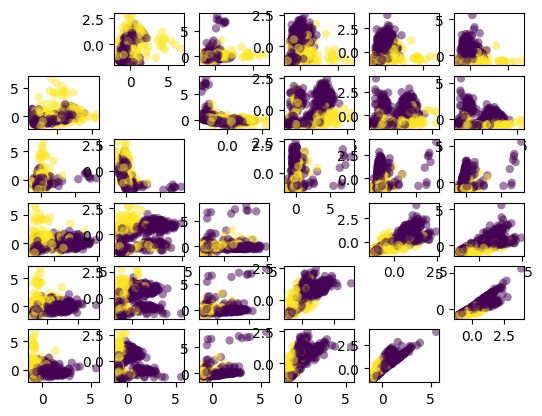

In [137]:
c=0
m=Xtest.shape[1]
for i in range(0,m):
        for j in range(0,m):
            c=c+1
            if i!=j:
                plt.subplot(m,m,c)
                plt.scatter(Xtest[:,i],Xtest[:,j],c=ytest,edgecolor="none", alpha=0.5)

In [138]:
RF.fit (Xtrain , ytrain)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8672\2036902179.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit (Xtrain , ytrain)


RandomForestClassifier(max_depth=50, n_estimators=200, random_state=1)

In [139]:
ypRF   = RF.predict(Xtest)
print(classification_report(ytest, ypRF , target_names=['CLASS2', 'CLASS1'] ))

              precision    recall  f1-score   support

      CLASS2       0.99      1.00      0.99       455
      CLASS1       0.99      0.97      0.98       153

    accuracy                           0.99       608
   macro avg       0.99      0.98      0.99       608
weighted avg       0.99      0.99      0.99       608



In [140]:
confusion_matrix(ytest, ypRF)

array([[454,   1],
       [  5, 148]], dtype=int64)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8672\3630254792.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  cf = RF.fit(Xtrain, ytrain)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8672\3630254792.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8672\3630254792.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  cf = RF.fit(Xtrain, ytrain)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8672\3630254792.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8672\3630254792.py:9: Dat

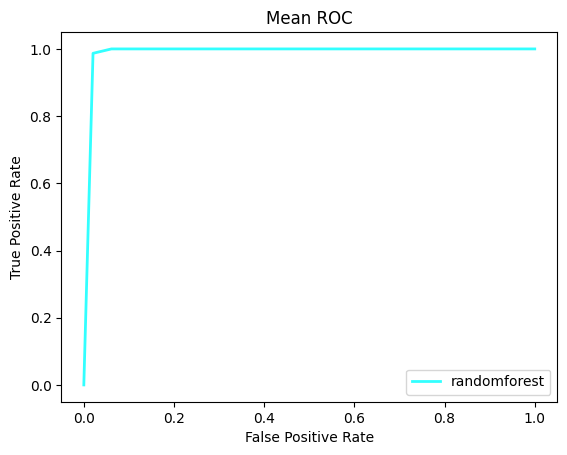

In [141]:
cv = StratifiedKFold(n_splits = 5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 50)
i = 0

for train, test in cv.split(X, y):
    cf = RF.fit(Xtrain, ytrain)
    probas_ = cf.predict_proba(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i += 1    
    
            
mean_tpr      = np.mean(tprs, axis=0)
mean_tpr[-1]  = 1.0
mean_auc      = auc(mean_fpr, mean_tpr)
std_auc       = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='cyan',label=r'randomforest' ,lw=2, alpha=.8)
std_tpr    = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Mean ROC')
plt.legend(loc="lower right");